## Cargar los datos 
### DataFrame:


In [24]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer


# Cargamos los datos
valoraciones = pd.read_json('data/web_reviews.json')


# Función .info()
## El resultado de `valoraciones.info()` es que contiene un total de **10,261 filas** y **9 columnas**.
**Columnas:**
- **reviewerID**: ID del revisor, tipo `object` (cadena de texto).
- **asin**: ID del producto, tipo `object`.
- **reviewerName**: Nombre del revisor, tipo `object`.
- **helpful**: Información sobre la utilidad de la reseña (como una lista que muestra votos útiles), tipo `object`.
- **reviewText**: Texto de la reseña, tipo `object`.
- **overall**: Calificación general del producto (1 a 5), tipo `int64`.
- **summary**: Resumen breve de la reseña, tipo `object`.
- **unixReviewTime**: Fecha de la reseña en formato de tiempo Unix, tipo `int64`.
- **reviewTime**: Fecha de la reseña en formato de texto, tipo `object`.

### Información adicional:
- **Tipos de datos**: La mayoría de las columnas son de tipo `object` (cadenas de texto), excepto `overall` y `unixReviewTime`, que son enteros (`int64`).
- **Uso de memoria**: El DataFrame ocupa aproximadamente **721.6 KB** en memoria.


In [25]:

# Visualizamos las primeras filas del dataset
print("Primeras filas del dataset:")
print(valoraciones.head())

# Revisamos la estructura de las columnas y el tipo de datos
print("\nInformación del dataset:")
print(valoraciones.info())


Primeras filas del dataset:
       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                      Rick Bennette "Rick Bennette    [1, 1]   
3                          RustyBill "Sunday Rocker    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...     

## .describe
El resultado de `valoraciones.describe()` proporciona un resumen estadístico de las columnas **numéricas** en el DataFrame. Ayudan a entender la distribución y la tendencia de las calificaciones junto con los tiempos de revisión:

### Interpretación:
- **overall**: 
  - Representa la calificación general del producto.
  - La media es de **4.59**, lo cual indica que la mayoría de las valoraciones son altas.
  - El valor mínimo es **1** y el máximo es **10**.
  
- **unixReviewTime**: 
  - Representa la fecha de la reseña en formato Unix.
  - La media es **1.356565e+09**, y el rango va desde **1.204819e+09** hasta **1.405382e+09**.

In [26]:
# Calculamos estadísticas descriptivas para la columna 'overall'
print("\nEstadísticas descriptivas de la calificación 'overall':")
print(valoraciones['overall'].describe())



Estadísticas descriptivas de la calificación 'overall':
count    10261.000000
mean         4.499659
std          1.415221
min          0.000000
25%          4.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: overall, dtype: float64


In [27]:
# Revisión de valores únicos y su distribución en 'overall'
print("\nDistribución de calificaciones (overall):")
print(valoraciones['overall'].value_counts())

# Análisis de la longitud de los textos en 'reviewText' para entender el contenido
valoraciones['review_length'] = valoraciones['reviewText'].apply(len)
print("\nLongitud promedio de las reseñas:")
print(valoraciones['review_length'].mean())


Distribución de calificaciones (overall):
overall
5     6595
4     1981
3      730
0      273
2      240
10     240
1      202
Name: count, dtype: int64

Longitud promedio de las reseñas:
485.9287593801774


## Entrenamos un modelo 

In [28]:
# Separar características y la variable objetivo
X = valoraciones['reviewText']
y = valoraciones['overall']

# Vectorización de los textos con TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limitamos el número de características para simplificar
X_vectorized = vectorizer.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Entrenar un modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nPrecisión del modelo: {accuracy:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")



Precisión del modelo: 0.65
Error absoluto medio (MAE): 0.74


## 


Distribución de calificaciones (overall):
overall
5     6595
4     1981
3      730
0      273
2      240
10     240
1      202
Name: count, dtype: int64


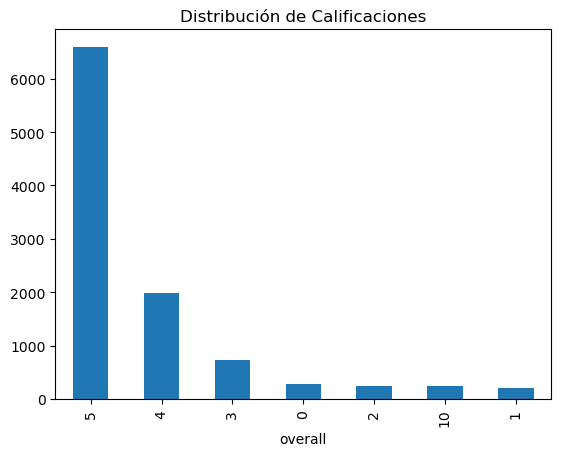

RandomForestClassifier(random_state=42)

In [29]:
# Revisar la distribución de las calificaciones
import matplotlib.pyplot as plt

print("\nDistribución de calificaciones (overall):")
print(valoraciones['overall'].value_counts())

# Visualizar la distribución
valoraciones['overall'].value_counts().plot(kind='bar', title='Distribución de Calificaciones')
plt.show()

# Vectorización del texto
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(valoraciones['reviewText'])
y = valoraciones['overall']

# División del conjunto de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento con RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluación de los datos 

In [30]:

# Evaluación
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))




Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00       131
           4       0.64      0.02      0.04       389
           5       0.65      1.00      0.79      1329
          10       0.00      0.00      0.00        54

    accuracy                           0.65      2053
   macro avg       0.18      0.15      0.12      2053
weighted avg       0.54      0.65      0.52      2053


Matriz de confusión:
[[   0    1    0    0    0   51    0]
 [   0    0    0    0    0   47    0]
 [   0    0    0    0    0   51    0]
 [   0    0    0    0    3  128    0]
 [   0    0    0    0    7  382    0]
 [   0    0    0    0    1 1328    0]
 [   0    0    0    0    0   54    0]]


c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

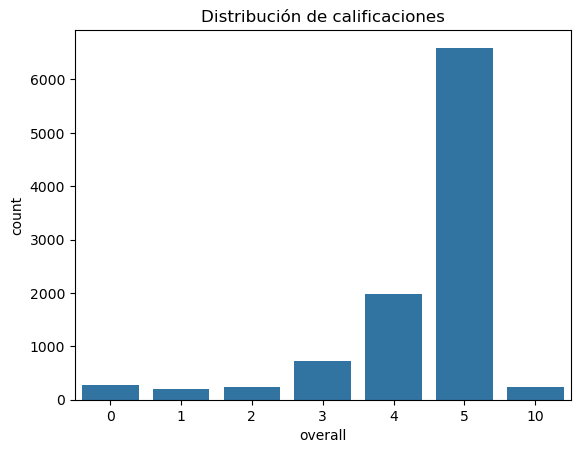

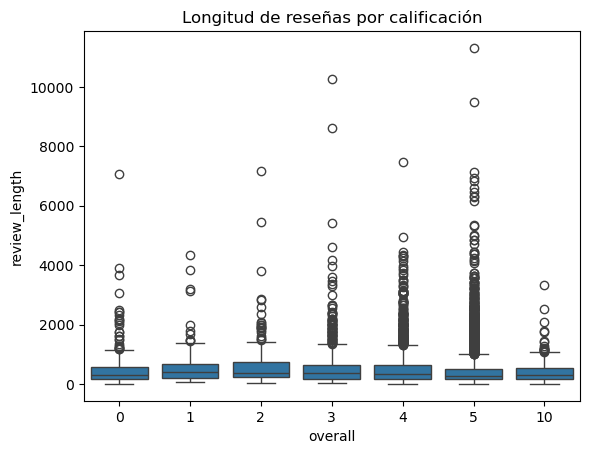

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de calificaciones
sns.countplot(x='overall', data=valoraciones)
plt.title('Distribución de calificaciones')
plt.show()

# Relación entre longitud de reseñas y calificaciones
sns.boxplot(x='overall', y='review_length', data=valoraciones)
plt.title('Longitud de reseñas por calificación')
plt.show()

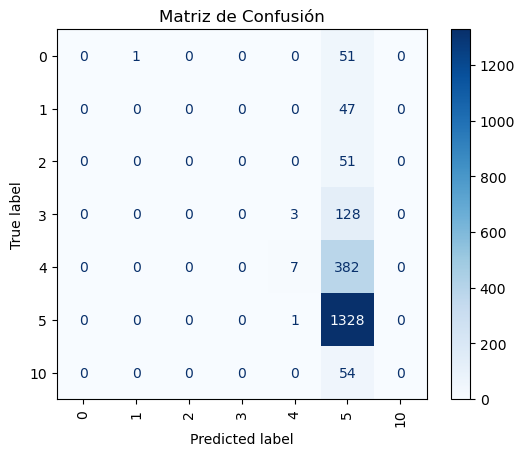

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Matriz de Confusión')
plt.show()


## caracteristicas de ---- mas importantes 

In [33]:
from sklearn.metrics import classification_report

# Obtener las clases únicas del conjunto de prueba
unique_classes = y_test.unique()
unique_classes_sorted = sorted(unique_classes) 

print("\nReporte de clasificación detallado:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in unique_classes_sorted]))


Reporte de clasificación detallado:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00       131
           4       0.64      0.02      0.04       389
           5       0.65      1.00      0.79      1329
          10       0.00      0.00      0.00        54

    accuracy                           0.65      2053
   macro avg       0.18      0.15      0.12      2053
weighted avg       0.54      0.65      0.52      2053



c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Definir parámetros para búsqueda aleatoria
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar y ajustar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)
random_search.fit(X_train, y_train)

# Definir best_model con el mejor estimador
best_model = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Validación cruzada con el mejor modelo
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión promedio con validación cruzada: {scores.mean():.2f} ± {scores.std():.2f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   3.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  11.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  12.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  16.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.6s
[CV] END max_dept

In [41]:

importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
top_features = vectorizer.get_feature_names_out()[sorted_indices[:10]]

print("\nTop 10 Características más importantes:")
for feature, importance in zip(top_features, importances[sorted_indices[:10]]):
    print(f"{feature}: {importance:.4f}")



Top 10 Características más importantes:
defective: 0.0055
returned: 0.0053
the: 0.0045
but: 0.0044
and: 0.0042
it: 0.0040
that: 0.0040
to: 0.0039
not: 0.0034
of: 0.0034


In [36]:
# Ajustar el modelo con los datos de entrenamiento
random_search.fit(X_train, y_train)

# **Definir best_model** después de la búsqueda
best_model = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Mapear las calificaciones originales a tres clases
def map_to_sentiment(overall):
    if overall <= 2:
        return 'Negativo'
    elif overall <= 5:
        return 'Neutro'
    else:
        return 'Positivo'

# Mapear los conjuntos de entrenamiento y prueba
y_train_mapped = y_train.map(map_to_sentiment)
y_test_mapped = y_test.map(map_to_sentiment)

# Reentrenar el mejor modelo con las etiquetas mapeadas
best_model.fit(X_train, y_train_mapped)

# Realizar predicciones
y_pred_mapped = best_model.predict(X_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   3.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   3.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   8.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.6s
[CV] END max_dept

In [37]:

# Generar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test_mapped, y_pred_mapped, target_names=['Negativo', 'Neutro', 'Positivo']))


Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.50      0.02      0.04       150
      Neutro       0.90      1.00      0.95      1849
    Positivo       0.00      0.00      0.00        54

    accuracy                           0.90      2053
   macro avg       0.47      0.34      0.33      2053
weighted avg       0.85      0.90      0.86      2053



c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

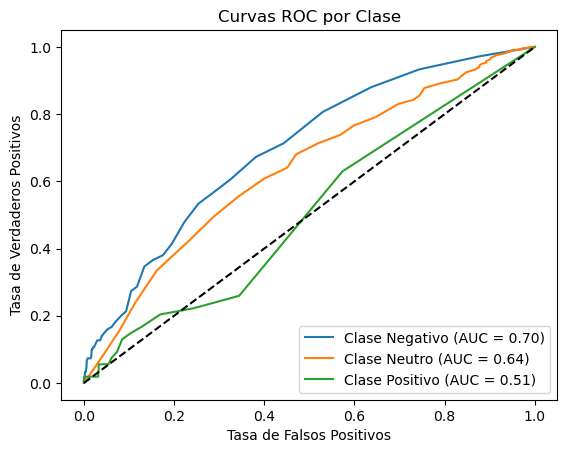

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar las etiquetas para cada clase
y_test_binarized = label_binarize(y_test_mapped, classes=['Negativo', 'Neutro', 'Positivo'])
y_score = best_model.predict_proba(X_test)

# Generar curvas ROC para cada clase
for i, class_name in enumerate(['Negativo', 'Neutro', 'Positivo']):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Clase {class_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase')
plt.legend(loc='lower right')
plt.show()


# pca

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = valoraciones.select_dtypes(include=['number'])

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)

# Implementar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Número de componentes seleccionados
print(f"Número de componentes seleccionados: {pca.n_components_}")

# Mostrar la proporción de varianza explicada por cada componente
print("\nProporción de varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


Número de componentes seleccionados: 3

Proporción de varianza explicada por cada componente:
[0.3979681  0.33193077 0.27010114]


# VER COIMPONENTES PRINCIPALES 

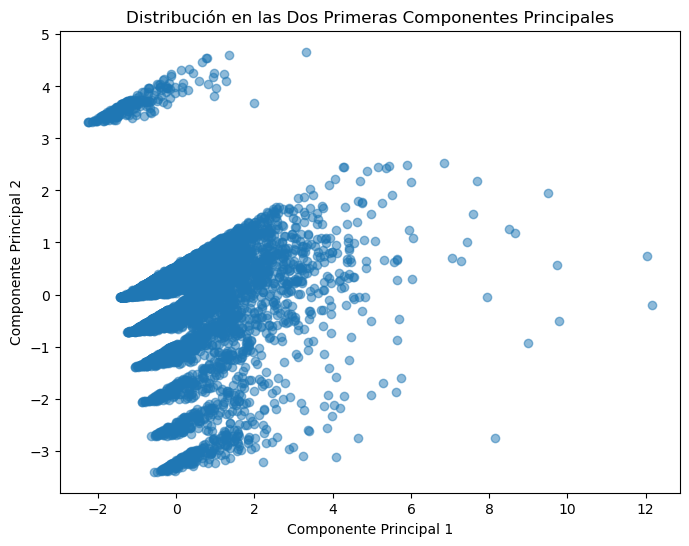

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Distribución en las Dos Primeras Componentes Principales')
plt.show()


In [61]:
# División de los datos transformados en entrenamiento y prueba
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar un modelo RandomForest usando las componentes principales
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)

# Evaluación del modelo
y_pred_pca = model_pca.predict(X_test_pca)
print("\nReporte de clasificación con PCA:")
print(classification_report(y_test, y_pred_pca))



Reporte de clasificación con PCA:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        47
           2       0.98      0.98      0.98        51
           3       0.99      0.99      0.99       131
           4       1.00      1.00      1.00       389
           5       1.00      1.00      1.00      1329
          10       1.00      1.00      1.00        54

    accuracy                           1.00      2053
   macro avg       0.99      0.99      0.99      2053
weighted avg       1.00      1.00      1.00      2053



# CORRELACION

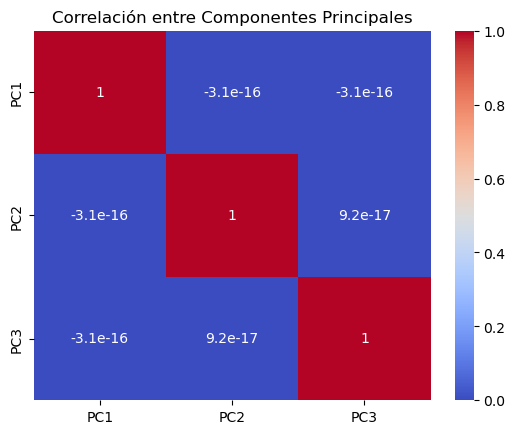

In [62]:
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
corr_after_pca = pca_df.corr()

sns.heatmap(corr_after_pca, annot=True, cmap='coolwarm')
plt.title('Correlación entre Componentes Principales')
plt.show()


## HISTORIA  1

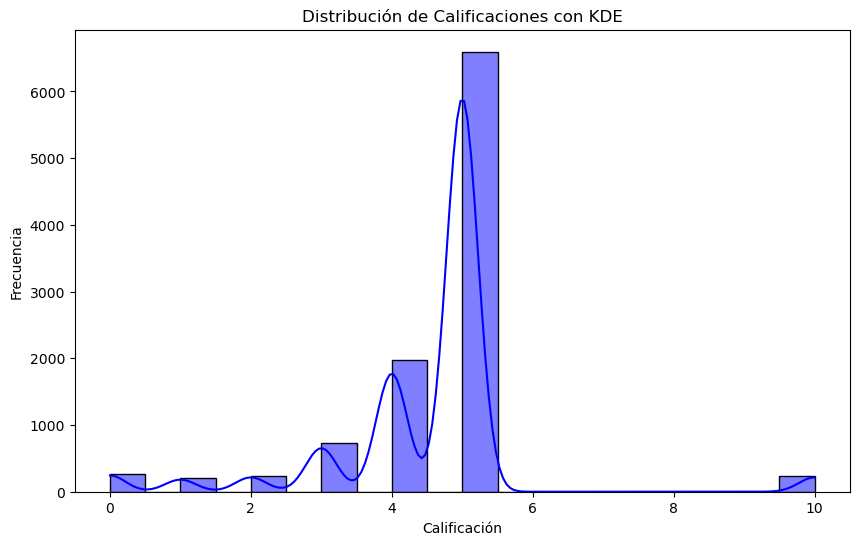

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de calificaciones con línea KDE
plt.figure(figsize=(10, 6))
sns.histplot(valoraciones['overall'], kde=True, bins=20, color='blue')
plt.title('Distribución de Calificaciones con KDE')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


## HISTORIA 2

C:\Users\trini\AppData\Local\Temp\ipykernel_11996\1768231529.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resenas_por_mes = valoraciones.set_index('reviewTime').resample('M').size()


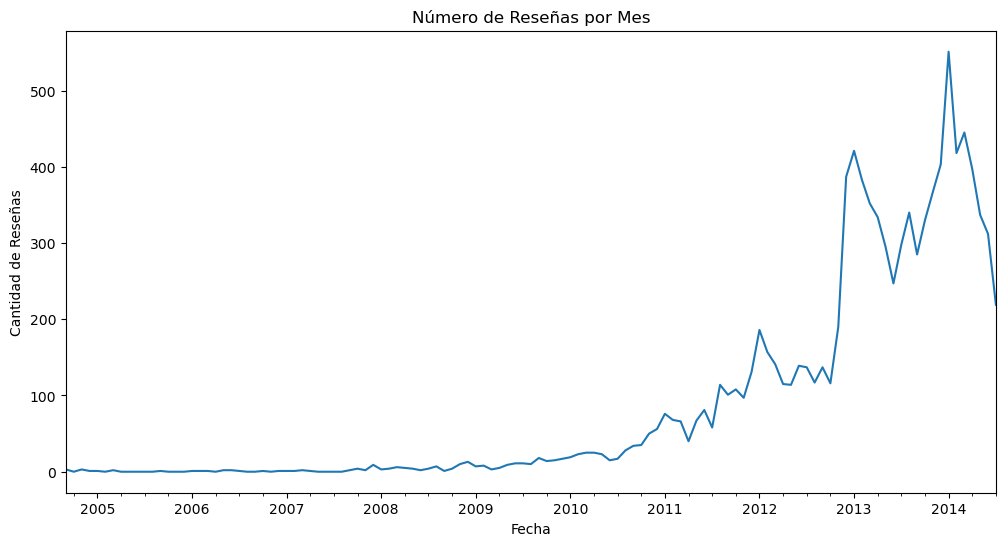

In [64]:
# Convertir la columna reviewTime a formato datetime
valoraciones['reviewTime'] = pd.to_datetime(valoraciones['reviewTime'])

# Contar reseñas por mes
resenas_por_mes = valoraciones.set_index('reviewTime').resample('M').size()

# Serie temporal
plt.figure(figsize=(12, 6))
resenas_por_mes.plot()
plt.title('Número de Reseñas por Mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Reseñas')
plt.show()


# HISTORIA 3

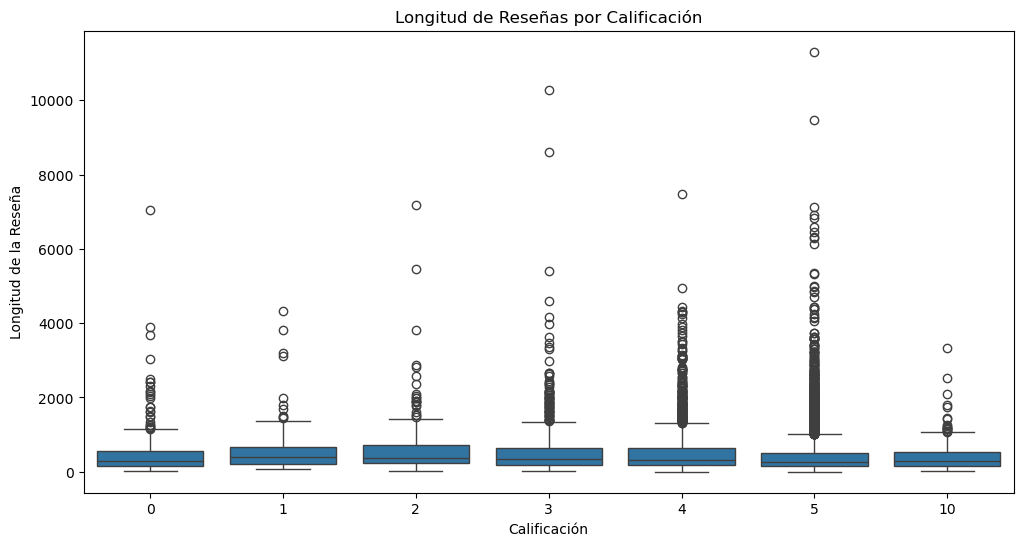

Prueba de normalidad - Estadístico: 1314.83, p-valor: 0.00
Las calificaciones no siguen una distribución normal.


In [65]:
from scipy.stats import normaltest

# Boxplot de longitud de reseñas por calificación
plt.figure(figsize=(12, 6))
sns.boxplot(x='overall', y='review_length', data=valoraciones)
plt.title('Longitud de Reseñas por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Longitud de la Reseña')
plt.show()

# Prueba de normalidad para las calificaciones
stat, p = normaltest(valoraciones['overall'])
print(f"Prueba de normalidad - Estadístico: {stat:.2f}, p-valor: {p:.2f}")
if p < 0.05:
    print("Las calificaciones no siguen una distribución normal.")
else:
    print("Las calificaciones parecen seguir una distribución normal.")


## EstandarizaR

In [66]:

# Estandarización de datos para SVM y Red Neuronal
scaler = StandardScaler(with_mean=False)  # Evitar conflictos con matriz dispersa
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## modelo SVM 

In [83]:
# Entrenar un modelo SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train_mapped)

# Predicciones SVM
y_pred_svm = svm_model.predict(X_test_scaled)
print("\nReporte de clasificación para SVM:")
print(classification_report(y_test_mapped, y_pred_svm, target_names=['Negativo', 'Neutro', 'Positivo']))


Reporte de clasificación para SVM:
              precision    recall  f1-score   support

    Negativo       0.26      0.33      0.29       150
      Neutro       0.92      0.90      0.91      1849
    Positivo       0.02      0.02      0.02        54

    accuracy                           0.84      2053
   macro avg       0.40      0.42      0.41      2053
weighted avg       0.85      0.84      0.84      2053



## red neuronal simple 

In [68]:

# Entrenar una Red Neuronal Simple
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train_mapped)

# Predicciones Red Neuronal
y_pred_mlp = mlp_model.predict(X_test_scaled)
print("\nReporte de clasificación para Red Neuronal:")
print(classification_report(y_test_mapped, y_pred_mlp, target_names=['Negativo', 'Neutro', 'Positivo']))


Reporte de clasificación para Red Neuronal:
              precision    recall  f1-score   support

    Negativo       0.29      0.13      0.18       150
      Neutro       0.91      0.97      0.94      1849
    Positivo       0.00      0.00      0.00        54

    accuracy                           0.88      2053
   macro avg       0.40      0.37      0.37      2053
weighted avg       0.84      0.88      0.86      2053



## comparacion entre modelos 

In [73]:
# Comparación de F1-score promedio
print("\nF1-Score Promedio:")
print(f"Random Forest: {f1_score(y_test_mapped, y_pred_mapped, average='weighted'):.2f}")
print(f"SVM: {f1_score(y_test_mapped, y_pred_svm, average='weighted'):.2f}")
print(f"Red Neuronal: {f1_score(y_test_mapped, y_pred_mlp, average='weighted'):.2f}")


F1-Score Promedio:
Random Forest: 0.86
SVM: 0.84
Red Neuronal: 0.86


## Analisis de correlacion

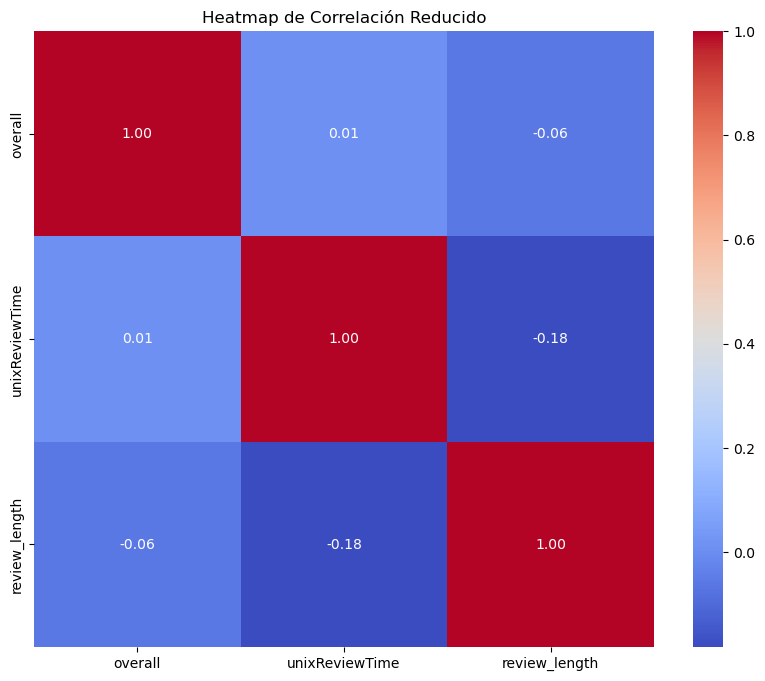

In [74]:
from sklearn.feature_selection import VarianceThreshold

# Eliminar columnas con varianza muy baja
selector = VarianceThreshold(threshold=0.01)  # 1% de varianza
numeric_cols_reduced = pd.DataFrame(selector.fit_transform(numeric_cols), columns=numeric_cols.columns[selector.get_support()])

# Correlación y Heatmap con columnas reducidas
corr_reduced = numeric_cols_reduced.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_reduced, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlación Reducido')
plt.show()


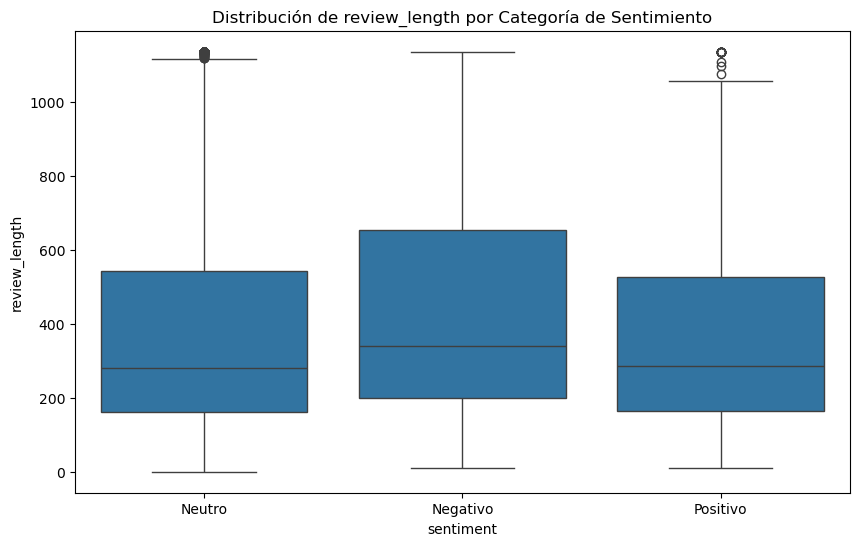

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear `overall` en categorías de sentimiento
def map_to_sentiment(overall):
    if overall <= 2:
        return 'Negativo'
    elif overall <= 5:
        return 'Neutro'
    else:
        return 'Positivo'

valoraciones['sentiment'] = valoraciones['overall'].map(map_to_sentiment)

# Visualizar la distribución de review_length para cada categoría de sentimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=valoraciones)
plt.title('Distribución de review_length por Categoría de Sentimiento')
plt.show()


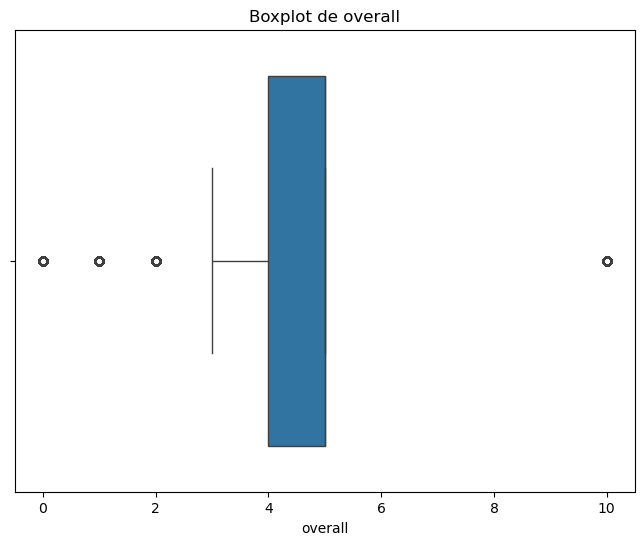

In [79]:
# Visualizar outliers en `overall` con un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=valoraciones['overall'])
plt.title('Boxplot de overall')
plt.show()


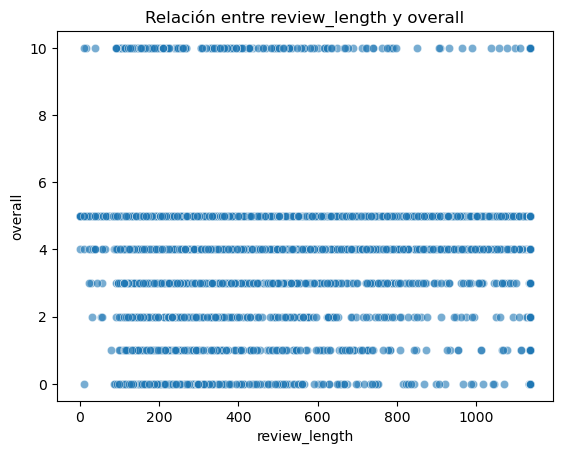

In [80]:
# Visualizar la relación entre review_length y overall
sns.scatterplot(x='review_length', y='overall', data=valoraciones, alpha=0.6)
plt.title('Relación entre review_length y overall')
plt.show()


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Incluir review_length y otras características relevantes en X
X_features = valoraciones[['review_length']]
X_text = vectorizer.transform(valoraciones['reviewText'])

# Combinar características de texto y numéricas
import scipy
X_combined = scipy.sparse.hstack((X_text, X_features))

# División en conjuntos de entrenamiento y prueba
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_combined, y_train)

# Predicciones
y_pred_rf = model_rf.predict(X_test_combined)

# Evaluación del modelo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00       131
           4       0.78      0.02      0.04       389
           5       0.65      1.00      0.79      1329
          10       0.00      0.00      0.00        54

    accuracy                           0.65      2053
   macro avg       0.20      0.15      0.12      2053
weighted avg       0.57      0.65      0.52      2053


Matriz de confusión:
[[   0    1    0    0    0   51    0]
 [   0    0    0    0    0   47    0]
 [   0    0    0    0    0   51    0]
 [   0    0    0    0    1  130    0]
 [   0    0    0    0    7  382    0]
 [   0    0    0    2    1 1326    0]
 [   0    0    0    0    0   54    0]]


c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\trini\miniconda3\envs\TODO_py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

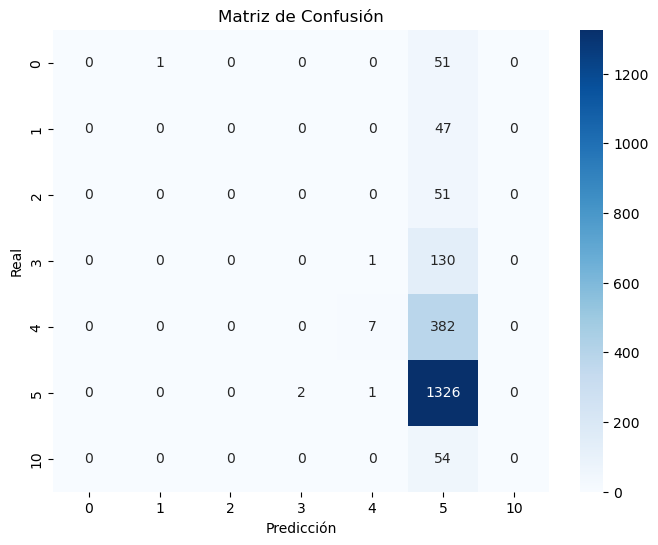

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf, labels=model_rf.classes_)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


## Outliers

In [75]:
# Detectar outliers usando IQR
q1 = valoraciones['review_length'].quantile(0.25)
q3 = valoraciones['review_length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Reemplazar valores fuera del rango IQR por los límites
valoraciones['review_length'] = valoraciones['review_length'].clip(lower_bound, upper_bound)
print("\nOutliers tratados en review_length.")



Outliers tratados en review_length.


## Buscar missing values

In [72]:
# Defino una función que me ayude a comparar las diferentes estrategias.
def score_dataset(X_train, X_valid, y_train, y_valid):
    ''' 
    Función para comparar estrategias y devolver el MAE 
    '''
    model = RandomForestRegressor(n_estimators=73, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Contamos los valores faltantes en cada columna
missing_values = valoraciones.isnull().sum()

# Filtramos solo las columnas que tienen valores faltantes
missing_values = missing_values[missing_values > 0]

# Mostramos los resultados
print("Valores faltantes por columna:")
print(missing_values)

# Identificar columnas con valores faltantes
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# ************************************************** NO SE PUEDEN ELIMINAR LAS MISSING VALUES PORQUE NO HAY *******************************************************


Valores faltantes por columna:
Series([], dtype: int64)


AttributeError: 'csr_matrix' object has no attribute 'columns'

## Técnicas de Tratamiento de Valores Faltantes y Preparación de Datos

En este documento se detallan las técnicas utilizadas para tratar valores faltantes y preparar los datos para el modelado. Cada técnica tiene sus propias ventajas y limitaciones, y la selección de cada una depende del contexto y las características de los datos.

## 1. Imputación Básica con la Media
La **imputación básica con la media** consiste en reemplazar los valores faltantes de cada columna por la media de esa columna. Este método es útil cuando los valores están distribuidos simétricamente, ya que la media representa el "centro" de la distribución de datos.

**Ventajas**:

- Sencillo de implementar.
- Mantiene el tamaño del conjunto de datos.

**Desventajas**:

- Puede sesgar los resultados si hay valores extremos.
- No conserva la variabilidad en los datos.


In [ ]:
# Imputación básica con la media
from sklearn.impute import SimpleImputer

# Imputación básica (media) como referencia
imputer = SimpleImputer(strategy='mean')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_test))
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_test.columns

print("MAE (imputación con media):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE (imputación con media):
0.9354842117671656


## 2. Imputación con Extensión Utilizando la Media
La **imputación con extensión** consiste en crear indicadores adicionales que registran si un valor era originalmente faltante. Luego, se imputa el valor faltante usando la media, lo que ayuda a conservar la información sobre los datos faltantes y permite al modelo "saber" que se ha realizado una imputación.

**Ventajas**:

- Conserva información sobre la ausencia de datos.
- Puede mejorar el rendimiento del modelo si los datos faltantes siguen un patrón.

**Desventajas**:

- Aumenta el número de características en el conjunto de datos.
- Puede agregar complejidad innecesaria si los valores faltantes son aleatorios.

In [ ]:
# Imputación con extensión utilizando la media
X_train_plus = X_train.copy()
X_valid_plus = X_test.copy()

# Añadir indicadores de valores faltantes
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputar la media
imputer = SimpleImputer(strategy='mean')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train_plus))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid_plus))
imputed_X_train.columns = X_train_plus.columns
imputed_X_valid.columns = X_valid_plus.columns

print("MAE (imputación con extensión y media):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE (imputación con extensión y media):
0.9354842117671656


## 3. Imputación con Extensión Utilizando la Mediana
La **imputación con extensión utilizando la mediana** es similar al método anterior, pero reemplaza los valores faltantes por la mediana de cada columna en lugar de la media. Es útil cuando los datos tienen una distribución sesgada o contienen valores atípicos, ya que la mediana es menos sensible a los valores extremos.

**Ventajas**:

- Reduce el sesgo causado por valores atípicos.
- Mantiene la robustez en presencia de distribuciones sesgadas.

**Desventajas**:

- Puede no capturar bien la media si los datos están distribuidos simétricamente.
- Al igual que la media, puede reducir la variabilidad original de los datos.

In [ ]:
# Imputación con extensión utilizando la mediana
X_train_plus = X_train.copy()
X_valid_plus = X_test.copy()

for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train_plus))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid_plus))
imputed_X_train.columns = X_train_plus.columns
imputed_X_valid.columns = X_valid_plus.columns

print("MAE (imputación con extensión y mediana):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE (imputación con extensión y mediana):
0.9354842117671656


## 4. Imputación con Extensión Utilizando la Moda
La **imputación con extensión utilizando la moda** reemplaza los valores faltantes por el valor más frecuente (o moda) de cada columna. Este método es especialmente útil para datos categóricos, donde la moda representa el valor que ocurre con mayor frecuencia.

**Ventajas**:

- Muy útil para datos categóricos.
- Mantiene la distribución de valores en columnas con poca variabilidad.

**Desventajas**:

- Puede introducir sesgo si la moda no representa bien los valores faltantes.
- Menos adecuado para datos numéricos continuos.

In [ ]:
# Imputación con extensión utilizando la moda
X_train_plus = X_train.copy()
X_valid_plus = X_test.copy()

for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train_plus))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid_plus))
imputed_X_train.columns = X_train_plus.columns
imputed_X_valid.columns = X_valid_plus.columns

print("MAE (imputación con extensión y moda):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE (imputación con extensión y moda):
0.9354842117671656


## 5. Imputación con Extensión Utilizando un Valor Constante
La **imputación con un valor constante** es una técnica donde se reemplazan los valores faltantes con un valor específico (por ejemplo, `0` o `-1`). Este método es útil cuando se desea marcar valores faltantes con un indicador específico o cuando el contexto permite asignar un valor neutro o común.

**Ventajas**:

- Proporciona flexibilidad para seleccionar el valor de imputación.
- Útil para valores categóricos o cuando el valor faltante tiene un significado específico.

**Desventajas**:

- Puede no ser adecuado si el valor constante no tiene sentido en el contexto de los datos.
- Puede afectar negativamente el rendimiento del modelo si el valor elegido introduce ruido.


In [ ]:
# Imputación con extensión utilizando un valor constante
X_train_plus = X_train.copy()
X_valid_plus = X_test.copy()

for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

imputer = SimpleImputer(strategy='constant', fill_value=0)
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train_plus))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid_plus))
imputed_X_train.columns = X_train_plus.columns
imputed_X_valid.columns = X_valid_plus.columns

print("MAE (imputación con extensión y valor constante):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE (imputación con extensión y valor constante):
0.9354842117671656


## 6. Eliminación de Columnas con Valores Faltantes
La **eliminación de columnas con valores faltantes** consiste en eliminar cualquier columna que contenga valores faltantes. Es una técnica útil si hay pocas columnas con valores faltantes o si las columnas no son esenciales para el modelo.

**Ventajas**:

- Sencilla de implementar y asegura que no haya datos faltantes en el conjunto final.
- Puede mejorar la eficiencia al reducir el número de características.

**Desventajas**:

- Puede resultar en la pérdida de información importante si las columnas eliminadas son relevantes.
- No es adecuado si muchas columnas contienen valores faltantes.

In [ ]:
# Selecciono las columnas con valores faltantes en el conjunto de entrenamiento.
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Elimino las columnas de los datos de entrenamiento y validación.
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_test.drop(cols_with_missing, axis=1)

# Calculo el MAE usando el conjunto de datos con columnas eliminadas.
print("MAE (eliminar columnas):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_test))


MAE (eliminar columnas):
0.9354842117671656


# Resumen Preproceso de datos 

In [ ]:
# Inputacion utilizando la media
print("MAE (imputación con media):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

# Inputacion con extensión utilizando la media
print("MAE (imputación con extensión y media):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

# Inputacion con extensión utilizando la mediana 
print("MAE (imputación con extensión y mediana):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

# Imputacion con extension utilizando la moda 
print("MAE (imputación con extensión y moda):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

# Calculo el MAE usando un valor constante
print("MAE (imputación con extensión y valor constante):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

# Calculo el MAE usando el conjunto de datos con columnas eliminadas.
print("MAE (eliminar columnas):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_test))

MAE (imputación con media):
0.9354842117671656
MAE (imputación con extensión y media):
0.9354842117671656
MAE (imputación con extensión y mediana):
0.9354842117671656
MAE (imputación con extensión y moda):
0.9354842117671656
MAE (imputación con extensión y valor constante):
0.9354842117671656
MAE (eliminar columnas):
0.9354842117671656



# Técnicas de Transformación de Variables Categóricas

Al preparar datos para un modelo de machine learning, es importante transformar las variables categóricas en un formato numérico adecuado. A continuación, se describen tres técnicas comunes para trabajar con variables categóricas.

## Eliminación de Variables Categóricas

La **eliminación de variables categóricas** consiste en descartar aquellas columnas categóricas que no son necesarias o que pueden introducir ruido en el modelo. Esta técnica es útil cuando ciertas variables categóricas no aportan información significativa o cuando el conjunto de datos tiene demasiadas categorías, lo que complica el proceso de codificación.

**Ventajas**:

- Sencillo de implementar, ya que solo requiere eliminar columnas.
- Reduce la dimensionalidad del conjunto de datos, mejorando la eficiencia.

**Desventajas**:

- Puede perderse información valiosa si las variables eliminadas son relevantes.
- No adecuado si se pierden variables importantes para el modelo.

In [ ]:
# Seleccionamos solo las columnas numéricas y eliminamos variables categóricas
X_numerico = valoraciones.select_dtypes(exclude=['object'])
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.2, random_state=1)

# Entrenamos un modelo de Random Forest usando solo variables numéricas
modelo_rf = RandomForestClassifier(random_state=1)
modelo_rf.fit(X_train, y_train)

# Evaluamos el modelo
accuracy = modelo_rf.score(X_test, y_test)
print(f'Precisión del modelo tras eliminar variables categóricas: {accuracy:.2f}')


Precisión del modelo tras eliminar variables categóricas: 1.00


## Codificación Ordinal (Ordinal Encoding)

La **codificación ordinal** asigna un valor numérico a cada categoría en una columna, siguiendo un orden. Este método es adecuado para variables categóricas que tienen un orden inherente, como "Bajo", "Medio" y "Alto". Con este enfoque, se asignan valores enteros a cada nivel de la categoría en orden creciente o decreciente.
**Ventajas**:

- Mantiene el orden natural de las categorías, lo que es importante para variables ordinales.
- Sencillo de implementar y no aumenta la dimensionalidad del conjunto de datos.

**Desventajas**:

- No es adecuado para variables categóricas sin un orden específico, ya que introduce relaciones numéricas que no existen.
- Puede causar problemas si el modelo interpreta los valores numéricos como cantidades en lugar de categorías.


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Seleccionamos las columnas categóricas
categoricas = valoraciones.select_dtypes(include=['object']).copy()

# Codificamos las columnas categóricas ordinales
ordinal_encoder = OrdinalEncoder()
categoricas_encoded = pd.DataFrame(ordinal_encoder.fit_transform(categoricas), columns=categoricas.columns)

# Combinamos las columnas numéricas y las codificadas ordinalmente
X_ordinal = pd.concat([X_numerico.reset_index(drop=True), categoricas_encoded], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_ordinal, y, test_size=0.2, random_state=1)

# Entrenamos el modelo
modelo_rf.fit(X_train, y_train)
accuracy = modelo_rf.score(X_test, y_test)
print(f'Precisión del modelo con codificación ordinal: {accuracy:.2f}')


Precisión del modelo con codificación ordinal: 1.00


### Codificación One-Hot (One-Hot Encoding)

La **codificación one-hot** convierte cada categoría en una columna binaria, donde se indica la presencia o ausencia de cada categoría con valores de `1` o `0`. Este método es adecuado para variables categóricas sin orden, como "Rojo", "Verde" y "Azul", ya que evita introducir relaciones numéricas entre categorías.

**Ventajas**:

- Evita introducir relaciones numéricas no deseadas en las variables categóricas sin orden.
- Facilita la interpretación del modelo cuando cada categoría tiene su propia columna.

**Desventajas**:

- Aumenta la dimensionalidad del conjunto de datos, especialmente cuando hay muchas categorías, lo que puede ralentizar el proceso de entrenamiento.
- Puede requerir mucho almacenamiento y procesamiento, especialmente para variables con un gran número de categorías.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inicializamos el codificador One-Hot y aplicamos la codificación
one_hot_encoder = OneHotEncoder(sparse_output=False)
categoricas_one_hot = one_hot_encoder.fit_transform(categoricas)

# Convertimos el resultado en un DataFrame con nombres de columnas
categoricas_one_hot_df = pd.DataFrame(categoricas_one_hot, columns=one_hot_encoder.get_feature_names_out(categoricas.columns))

# Combinamos las columnas numéricas y las codificadas con One-Hot
X_one_hot = pd.concat([X_numerico.reset_index(drop=True), categoricas_one_hot_df.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=1)

# Entrenamos el modelo
modelo_rf = RandomForestClassifier(random_state=1)
modelo_rf.fit(X_train, y_train)
accuracy = modelo_rf.score(X_test, y_test)
print(f'Precisión del modelo con codificación One-Hot: {accuracy:.2f}')


Precisión del modelo con codificación One-Hot: 0.97


Outliers

métodos IQR

z-score.